PROJETO - MÓDULO ESTATÍSTICA

ALUNOS:

RODRIGO VIANNINI

LEONARDO AZEVEDO

## CONTEXTUALIZAÇÃO

A Autoridade De Estatística das Filipinas (PSA) lidera a realização da Pesquisa de Renda e Despesa Familiar (FIES) em todo o país. A pesquisa, realizada a cada 3 (três) anos, tem como objetivo fornecer dados sobre renda e despesas familiares, incluindo, entre outros, níveis de consumo por item de despesa, fontes de renda em dinheiro e informações relacionadas que afetam a renda e níveis de despesas e padrões nas Filipinas. Dessa forma, pede-se que seja elaborado um relatório prévio com insights e análise de dados por parte de um cientista de dados.

In [ ]:
# Importando as bibliotecas convencionais

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

%matplotlib inline

In [ ]:
# importando bibliotecas específicas

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import norm
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rodrigoviannini/Analises_Dados/main/Previsao%20de%20Renda%20com%20Regressao%20Linear%20-%20Filipinas/Dados_Renda_Despesa_Filipinas.csv')


In [ ]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [ ]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [ ]:
df.shape

(41544, 60)

## Milestone 1 - Amostra e Descrição



1. Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%.



In [ ]:
## Calcular amostra ideal
# Média do $ gasto com saúde [Medical Care Expenditure]
# Erro Máximo = 500
# Confiança = 95%

sigma = df['Medical Care Expenditure'].std()    #desvio padrão do meu gasto com saúde
maximum_error = 500
trust_level = 0.95
significance_level = (1 - trust_level)

In [ ]:
z_alpha_squared = norm.ppf(trust_level + (significance_level / 2))
z_alpha_squared

1.959963984540054

In [ ]:
minimum_number = (z_alpha_squared * sigma / maximum_error) ** 2
minimum_number

11120.527374834619

In [ ]:
ideal_sample = round(np.ceil(minimum_number))
ideal_sample

11121

2. Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.

In [ ]:
new_sample = df.sample(n=ideal_sample, random_state=101)
new_sample.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
1849,162566,V - Bicol Region,85025,Enterpreneurial Activities,1,28108,22932,3614,10058,3750,...,0,0,0,0,0,3,0,0,0,0
29179,218765,IVA - CALABARZON,71775,Other sources of Income,0,30273,20091,7180,4092,1300,...,1,0,0,0,0,3,0,0,0,0
20513,551982,NCR,214203,Wage/Salaries,0,21228,12326,48055,17536,660,...,1,1,0,0,0,3,2,0,0,0
28910,443465,I - Ilocos Region,223936,Other sources of Income,0,66348,51000,36404,12411,2172,...,1,1,0,0,0,3,1,0,0,1
2162,144350,ARMM,80055,Enterpreneurial Activities,1,31586,24864,280,15975,2798,...,0,0,0,0,0,2,0,0,1,0


In [ ]:
## VARIÁVEIS QUANTITATIVAS: 
# 1. renda familiar total, 2. despeza total de alimentos, 3. principal fonte de renda, 4. despesa com paes e cereais, 
# 5. despeza total de arroz, 6. gastos com carne, 7. despesas de habitação e água, 8. despesas com frutas, 9. gastos com vegetais, 
# 10. despesas com bebidas alcoolicas

df_ten_variables = df[['Total Household Income', 'Total Food Expenditure', 'Main Source of Income', 'Bread and Cereals Expenditure','Total Rice Expenditure', 'Meat Expenditure', 'Housing and water Expenditure', 'Vegetables Expenditure', 'Alcoholic Beverages Expenditure', ]]

df_ten_variables.head()



,Total Household Income,Total Food Expenditure,Main Source of Income,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Housing and water Expenditure,Vegetables Expenditure,Alcoholic Beverages Expenditure
0,480332,117848,Wage/Salaries,42140,38300,24676,63636,13460,0
1,198235,67766,Wage/Salaries,17329,13008,17434,41370,7833,960
2,82785,61609,Wage/Salaries,34182,32001,7783,14340,3795,270
3,107589,78189,Wage/Salaries,34030,28659,10914,16638,7887,480
4,189322,94625,Wage/Salaries,34820,30167,18391,31122,11260,1040


## Milestone 2 - Inferência Estatística



1. Utilizando um nível de confiança de 95%, calcule o intervalo de confiança do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).

In [ ]:
# Confiança = 95%
# Calcule o intervalo de confiança do $ gasto com saúde e educação

trust_level = 0.95                                               
significance_level = (1 - trust_level)                           # alpha

average_health = new_sample['Medical Care Expenditure'].mean()   # média de gastos com saúde
sample_health = len(new_sample['Medical Care Expenditure'])      # Qtde de amostra de gastos com saúde
sigma_health = new_sample['Medical Care Expenditure'].std()              # desvio padrão do meu gasto com saúde

average_education = new_sample['Education Expenditure'].mean()   # média de gastos com saúde
sample_education = len(new_sample['Education Expenditure'])      # Qtde de amostra de gastos com saúde
sigma_education = new_sample['Education Expenditure'].std()              # desvio padrão do meu gasto com saúde

In [ ]:
# Intervalo de confiança de gastos com saúde

interval_trust_health = norm.interval(trust_level, loc=average_health, scale=(sigma_health / np.sqrt(sample_health)))
interval_trust_health

(6673.014229441167, 7605.871482275405)

In [ ]:
# Intervalo de confiança de gastos com educação

interval_trust_education = norm.interval(trust_level, loc=average_education, scale=(sigma_education / np.sqrt(sample_education)))
interval_trust_education

(6923.435952773181, 7650.380610485519)

2. Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.



In [ ]:
# Há diferença de média de número total de membros da família pelo sexo do chefe de família?
new_sample['Household Head Sex'].value_counts()

Male      8691
Female    2430
Name: Household Head Sex, dtype: int64

In [ ]:
# Chefe de família - Homem
male_householder = new_sample[new_sample['Household Head Sex'] == 'Male']
male_householder.shape[0]

8691

In [ ]:
# Chefe de família - Mulher
female_householder = new_sample[new_sample['Household Head Sex'] == 'Female']
female_householder.shape[0]

2430

In [ ]:
# Média e desvio padrão de homens como chefes de família
average_male = male_householder['Total Number of Family members'].mean()
sigma_male = male_householder['Total Number of Family members'].std()
average_male, sigma_male

(4.861350822690139, 2.257882949418086)

In [ ]:
# Média e desvio padrão de mulheres como chefes de família
average_female = female_householder['Total Number of Family members'].mean()
sigma_female = female_householder['Total Number of Family members'].std()
average_female, sigma_female

(3.8465020576131685, 2.2499023598492838)

In [ ]:
# Calcular a diferença - confiança = 95%
trust_level = 0.95   
significance_level = (1 - trust_level)      # alpha

quantity_men = len(male_householder)
quantity_women = len(female_householder)
D0 = 0


In [ ]:
numerator = (average_male - average_female) - D0
denominator = np.sqrt((sigma_male ** 2 / quantity_men) + (sigma_female ** 2 / quantity_women))
Z = (numerator / denominator)
Z

19.641145336535892

In [ ]:
p_value = norm.sf(Z) * 2
p_value

6.882826265315254e-86

In [ ]:
# Z de (alpha)² 
z_alpha_squared = norm.ppf(trust_level + (significance_level / 2))
z_alpha_squared

1.959963984540054

In [ ]:
# h0 -> Descartar: Z >= z_alpha_squared
Z >= z_alpha_squared

True

In [ ]:
# h0 -> Descartar: p_value <= significance_level (alpha)
p_value <= significance_level

True

H0 = m1 - m2 -> (average_male - average_female)

---


H1 = m1 - m2! -> (average_male - average_female!)

In [ ]:
# Testar
# Estatísticas descritivas e testes com pesos para pesos de caso
test_male = DescrStatsW(male_householder['Total Number of Family members'])
test_female = DescrStatsW(female_householder['Total Number of Family members'])

In [ ]:
# Comparar
# classe para dois exemplos de comparação
to_compare_sex = CompareMeans(test_male, test_female)

In [ ]:
# Z Test
# A função ztest.ind() testa a hipótese nula de que de que as duas distribuições possuem médias idênticas.
Z, p_value = to_compare_sex.ztest_ind()
Z, p_value


(19.602027594446085, 1.4858393205614605e-85)

- Z:    Nas estatísticas, um escore-z (ou escore padrão) de uma observação é o número de desvios padrão acima ou abaixo da média da população. Para calcular um escore z, é necessário saber a média da população e o desvio padrão da população.

---

- p-value:   Na estatística clássica, o valor-p, é a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula. Por exemplo, em testes de hipótese, pode-se rejeitar a hipótese nula a 5% caso o valor-p seja menor que 5%


-   RESPOSTA: Há diferenças de média do número total de membros da família pelo sexo do householder


In [ ]:
# Calcular a diferença - confiança = 95%
trust_level = 0.95   
significance_level = (1 - trust_level)      # alpha

quantity_men = len(male_householder)
quantity_women = len(female_householder)
D0 = 0


In [ ]:
numerator = (average_male - average_female) - D0
denominator = np.sqrt((sigma_male ** 2 / quantity_men) + (sigma_female ** 2 / quantity_women))
Z = (numerator / denominator)
Z

19.641145336535892

In [ ]:
p_value = norm.sf(Z) * 2
p_value

6.882826265315254e-86

In [ ]:
# Z de (alpha)² 
z_alpha_squared = norm.ppf(trust_level + (significance_level / 2))
z_alpha_squared

1.959963984540054

In [ ]:
# h0 -> Descartar: Z >= z_alpha_squared
Z >= z_alpha_squared

True

In [ ]:
# h0 -> Descartar: p_value <= significance_level (alpha)
p_value <= significance_level

True

3. Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).
   OBS: Considere “Enteroreneurial activities” e “other sources of income” como "outros".

In [ ]:
# Visualizar todos os valores
new_sample['Main Source of Income'].value_counts() # Principal fonte de renda


Wage/Salaries                 5517
Other sources of Income       2887
Enterpreneurial Activities    2717
Name: Main Source of Income, dtype: int64

In [ ]:
# Substituir os nomes 'Other sources of Income', 'Enterpreneurial Activities' por 'other'
# Vizualizar modificação
new_sample['Main Source of Income'].replace(['Other sources of Income', 'Enterpreneurial Activities'], 'other', inplace = True)
new_sample['Main Source of Income'].value_counts()


other            5604
Wage/Salaries    5517
Name: Main Source of Income, dtype: int64

In [ ]:
wage_salaries = new_sample[new_sample['Main Source of Income'] == 'Wage/Salaries']
wage_salaries.head(2)


,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
20513,551982,NCR,214203,Wage/Salaries,0,21228,12326,48055,17536,660,...,1,1,0,0,0,3,2,0,0,0
29955,303000,IVA - CALABARZON,113739,Wage/Salaries,0,20422,13390,19458,6488,2480,...,1,1,0,0,0,2,2,1,0,0


In [ ]:
wage_salaries.shape[0]

5517

In [ ]:
other = new_sample[new_sample['Main Source of Income'] == 'other']
other.head(2)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
1849,162566,V - Bicol Region,85025,other,1,28108,22932,3614,10058,3750,...,0,0,0,0,0,3,0,0,0,0
29179,218765,IVA - CALABARZON,71775,other,0,30273,20091,7180,4092,1300,...,1,0,0,0,0,3,0,0,0,0


In [ ]:
other.shape[0]

5604

In [ ]:
test_income = DescrStatsW(wage_salaries['Total Household Income'])
test_total_income = DescrStatsW(other['Total Household Income'])

In [ ]:
to_compare_income = CompareMeans(test_income, test_total_income)

In [ ]:
Z, p_value = to_compare_income.ztest_ind()
Z, p_value

(7.059219960270567, 1.6743984879045323e-12)

- Z:    Nas estatísticas, um escore-z (ou escore padrão) de uma observação é o número de desvios padrão acima ou abaixo da média da população. Para calcular um escore z, é necessário saber a média da população e o desvio padrão da população.

---

- p-value:   Na estatística clássica, o valor-p, é a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula. Por exemplo, em testes de hipótese, pode-se rejeitar a hipótese nula a 5% caso o valor-p seja menor que 5%

In [ ]:
average_income_family_salaried = wage_salaries['Total Household Income'].mean()
sigma_income_family_salaried = wage_salaries['Total Household Income'].std()
average_income_family_salaried, sigma_income_family_salaried

(267885.33822729747, 256987.2985226311)

In [ ]:
average_total_family_income = other['Total Household Income'].mean()
sigma_total_family_income = other['Total Household Income'].std()
average_total_family_income, sigma_total_family_income

(229955.13668807995, 307021.60079944204)

H0 = m1 - m2 -> (average_income_family_salaried - average_total_family_income)

---


H1 = m1 - m2! -> (average_income_family_salaried - average_total_family_income!)

In [ ]:
# Calcular a diferença - confiança = 95%
trust_level = 0.95   
significance_level = (1 - trust_level)      # alpha

quantity_wage_salaries = len(wage_salaries)
quantity_other = len(other)
D0 = 0

In [ ]:
numerator = (average_income_family_salaried - average_total_family_income) - D0
denominator = np.sqrt((sigma_income_family_salaried ** 2 / quantity_wage_salaries) + (sigma_total_family_income ** 2 / quantity_other))
Z = (numerator / denominator)
Z

7.068949178953923

In [ ]:
p_value = norm.sf(Z) * 2
p_value

1.5611130293736158e-12

In [ ]:
# Z de (alpha)² 
z_alpha_squared = norm.ppf(trust_level + (significance_level / 2))
z_alpha_squared

1.959963984540054

In [ ]:
# h0 -> Descartar: Z >= z_alpha_squared
Z >= z_alpha_squared

True

In [ ]:
# h1 -> Descartar: p_value <= significance_level (alpha)
p_value <= significance_level

True


-   RESPOSTA: Há diferença de média entre rendas de famílias assalariadas e de famílias com outras rendas.


## Milestone 3 - Previsão de Renda Com Regressão Linear


Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.

In [ ]:
new_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11121 entries, 1849 to 25721
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         11121 non-null  int64 
 1   Region                                         11121 non-null  object
 2   Total Food Expenditure                         11121 non-null  int64 
 3   Main Source of Income                          11121 non-null  object
 4   Agricultural Household indicator               11121 non-null  int64 
 5   Bread and Cereals Expenditure                  11121 non-null  int64 
 6   Total Rice Expenditure                         11121 non-null  int64 
 7   Meat Expenditure                               11121 non-null  int64 
 8   Total Fish and  marine products Expenditure    11121 non-null  int64 
 9   Fruit Expenditure                              11121 non-n

In [ ]:
new_sample.shape

(11121, 60)

In [ ]:
def correlations(dataframe, threshold):
    """ Função que percorre um DataFrame filtrando os valores númericos, determinando o Coeficiencte de Correlação de Pearson de x (Renda familiar Total) e o y (colunas). Se este valor de Pearson for maior que o Limiar desejado adicionamos a Lista de Colunas à ser retornada  """

    features = []

    for column in dataframe.columns:
        
        if dataframe[column].dtype == 'int64':
            pearson_correlation_coefficient, p_value = pearsonr(dataframe['Total Household Income'], dataframe[column])

            if pearson_correlation_coefficient > threshold:
                features.append(column)

    return features    

In [ ]:
correlations(new_sample, 0.6)


['Total Household Income',
 'Total Food Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Imputed House Rental Value',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Miscellaneous Goods and Services Expenditure']

In [ ]:
features = ['Total Food Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure', 
 'Imputed House Rental Value',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Miscellaneous Goods and Services Expenditure']

# Retirar: 'Imputed House Rental Value' (Valor imputado do aluguel da casa), 
# Pois pode ser considerado valor duplicado, no item 'Housing and water Expenditure' (Despesas de habitação e água)
# Provavelmente o custo de aluguel já está incluso nos despesas com habitação e água 


In [ ]:
X = new_sample[features]
X.shape

(11121, 7)

In [ ]:
y = new_sample['Total Household Income']
y.shape

(11121,)

In [ ]:
lr = LinearRegression().fit(X,y)

In [ ]:
y_estimated = lr.predict(X)

In [ ]:
lr.score(X,y)

0.7493446490124738

In [ ]:
r2_score(y,y_estimated)

0.7493446490124738

In [ ]:
x = sm.add_constant(X)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.749
Model:                                OLS   Adj. R-squared:                  0.749
Method:                     Least Squares   F-statistic:                     4746.
Date:                    Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                            21:20:58   Log-Likelihood:            -1.4773e+05
No. Observations:                   11121   AIC:                         2.955e+05
Df Residuals:                       11113   BIC:                         2.955e+05
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          7193.1549   2756.235      2.610      0.009    1790.444    1.26e+04
Total Food Expenditure                            0.8137      0.039     20.905      0.000       0.737       0.890
Clothing, Footwear and Other Wear Expenditure     5.4166      0.236     22.954      0.000       4.954       5.879
Housing and water Expenditure                     1.1041      0.075     14.795      0.000       0.958       1.250
Imputed House Rental Value                        0.7309      0.088      8.303      0.000       0.558       0.903
Transportation Expenditure                        2.7421      0.103     26.504      0.000       2.539       2.945
Communication Expenditure                         4.7352      0.294     16.110      0.000       4.159       5.311
Miscellaneous Goods and Services Expenditure      2.8021      0.113     24.759      0.000       2.580       3.024
==============================================================================
Omnibus:                    16979.588   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18911525.919
Skew:                           9.214   Prob(JB):                         0.00
Kurtosis:                     204.179   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Média dos resíduos
model.resid.mean()

1.6413921825792086e-11

In [ ]:
plt.figure(figsize=(8, 7))
sns.histplot(model.resid, kde=True);

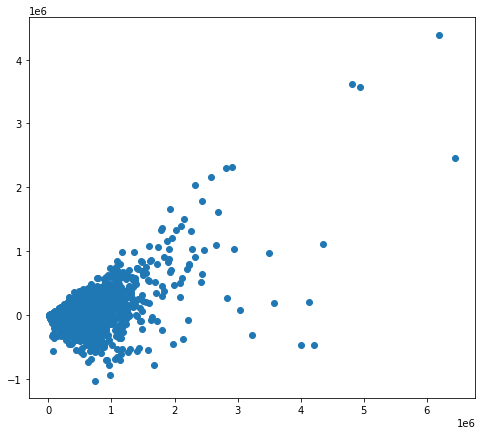

In [ ]:
plt.figure(figsize=(8, 7))
plt.scatter(y, model.resid);


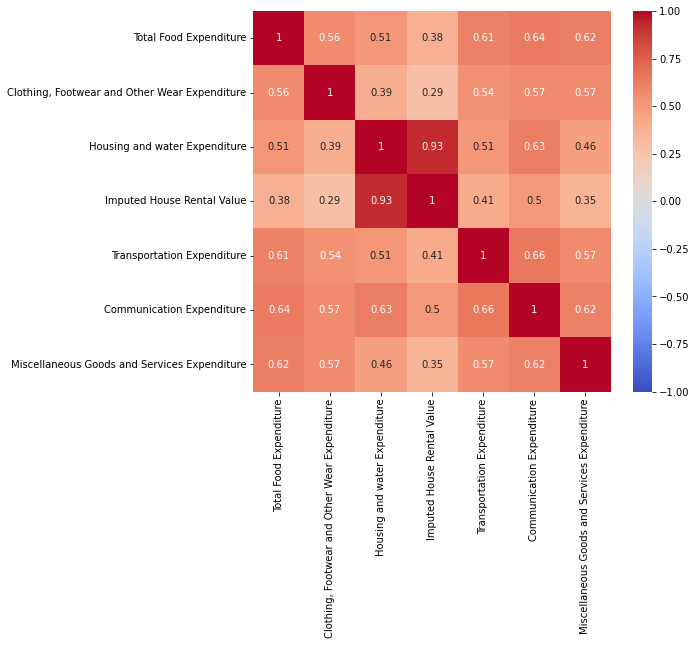

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

<Figure size 576x720 with 0 Axes>

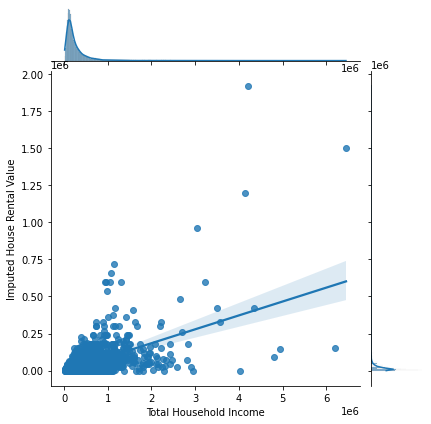

In [ ]:
plt.figure(figsize=(8, 10))
sns.jointplot(data=new_sample, x='Total Household Income', y='Imputed House Rental Value', kind='reg');

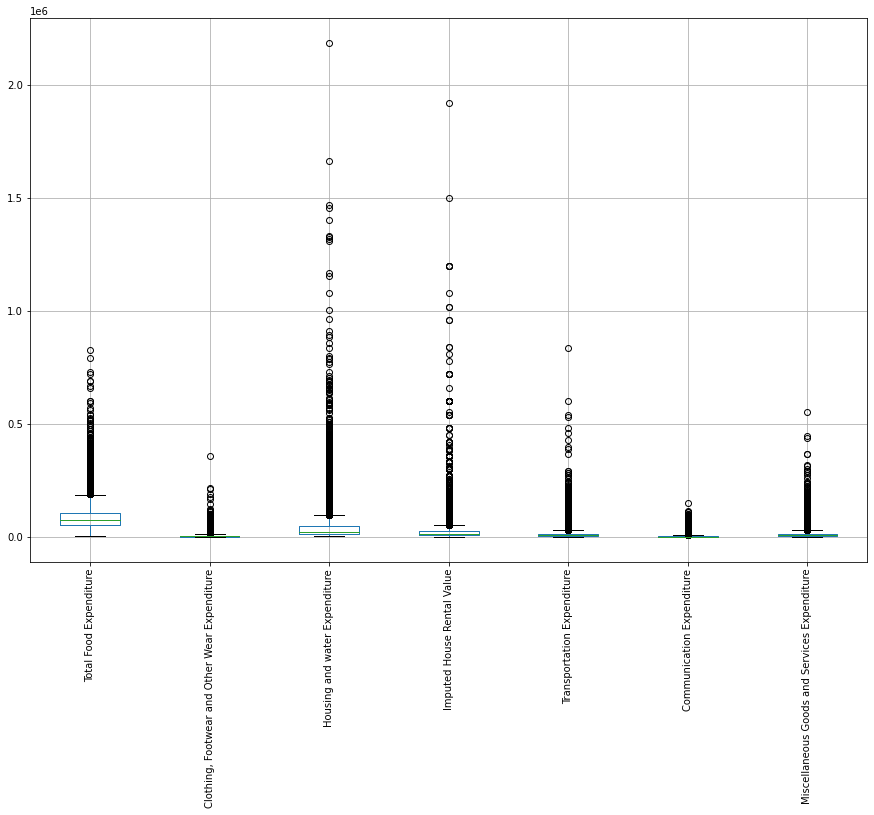

In [ ]:
df.boxplot(column = features, figsize = (15,10));
plt. xticks(rotation=90);

## Retirando Outliers

In [ ]:
def calc_min_and_max_range(data_features):
    Q1 = data_features.quantile(q=0.25) # Primeiro quartil
    Q3 = data_features.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    low = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR

    return low, up


In [ ]:
calc_min_and_max_range(new_sample)

(Total Household Income                          -176506.5
 Total Food Expenditure                           -31384.5
 Agricultural Household indicator                     -1.5
 Bread and Cereals Expenditure                     -5757.0
 Total Rice Expenditure                            -8285.0
 Meat Expenditure                                 -13320.0
 Total Fish and  marine products Expenditure       -6380.0
 Fruit Expenditure                                 -2147.5
 Vegetables Expenditure                            -2253.0
 Restaurant and hotels Expenditure                -25190.0
 Alcoholic Beverages Expenditure                   -1950.0
 Tobacco Expenditure                               -4680.0
 Clothing, Footwear and Other Wear Expenditure     -5017.5
 Housing and water Expenditure                    -37623.0
 Imputed House Rental Value                       -21000.0
 Medical Care Expenditure                          -6317.5
 Transportation Expenditure                       -14700

In [ ]:
columns_to_remove_outliers = ['Total Household Income', 
       'Total Food Expenditure',
       'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 
       'Imputed House Rental Value',
       'Transportation Expenditure', 
       'Communication Expenditure',
       'Miscellaneous Goods and Services Expenditure']

for column in columns_to_remove_outliers:
    low, up = calc_min_and_max_range(new_sample[features])
    
    # Filtro para pegar apenas as linhas cujos dados estão dentro do intervalo aceitável (não outliers)
    df = df[(new_sample[features] >= low) & (new_sample[features] <= up)]

In [ ]:
new_sample.shape

(11121, 60)

In [ ]:
X_final = new_sample[['Total Food Expenditure',
       'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 
       'Imputed House Rental Value',
       'Transportation Expenditure', 
       'Communication Expenditure',
       'Miscellaneous Goods and Services Expenditure']]
X_final.head(2)

,Total Food Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Transportation Expenditure,Communication Expenditure,Miscellaneous Goods and Services Expenditure
1849,85025,2720,9240,6000,9846,2136,4500
29179,71775,3500,22650,12000,4608,1428,11622


In [ ]:
y_final = new_sample[['Total Household Income']]
y_final.head(2)

,Total Household Income
1849,162566
29179,218765


In [ ]:
# Teste = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=101)

In [ ]:
X_train.shape

(7784, 7)

In [ ]:
X_final.shape

(11121, 7)

In [ ]:
X_test.shape

(3337, 7)

In [ ]:
lr_final = LinearRegression().fit(X_train, y_train)

In [ ]:
y_estimated_final = lr_final.predict(X_test) 

In [ ]:
r2_score(y_test, y_estimated_final)

0.7146296333507499

In [ ]:
lr.score(X_train, y_train)

0.7595205363216024

In [ ]:
x = sm.add_constant(X_final)

model = sm.OLS(y_final, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.749
Model:                                OLS   Adj. R-squared:                  0.749
Method:                     Least Squares   F-statistic:                     4746.
Date:                    Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                            20:57:38   Log-Likelihood:            -1.4773e+05
No. Observations:                   11121   AIC:                         2.955e+05
Df Residuals:                       11113   BIC:                         2.955e+05
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          7193.1549   2756.235      2.610      0.009    1790.444    1.26e+04
Total Food Expenditure                            0.8137      0.039     20.905      0.000       0.737       0.890
Clothing, Footwear and Other Wear Expenditure     5.4166      0.236     22.954      0.000       4.954       5.879
Housing and water Expenditure                     1.1041      0.075     14.795      0.000       0.958       1.250
Imputed House Rental Value                        0.7309      0.088      8.303      0.000       0.558       0.903
Transportation Expenditure                        2.7421      0.103     26.504      0.000       2.539       2.945
Communication Expenditure                         4.7352      0.294     16.110      0.000       4.159       5.311
Miscellaneous Goods and Services Expenditure      2.8021      0.113     24.759      0.000       2.580       3.024
==============================================================================
Omnibus:                    16979.588   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18911525.919
Skew:                           9.214   Prob(JB):                         0.00
Kurtosis:                     204.179   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Média dos resíduos sem outliers
model.resid.mean()

1.6413921825792086e-11

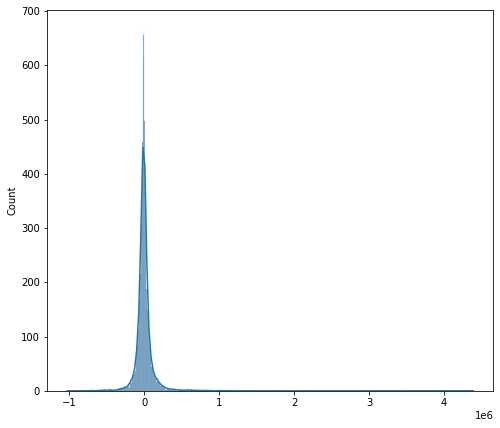

In [ ]:
plt.figure(figsize=(8, 7))
sns.histplot(model.resid, kde=True);

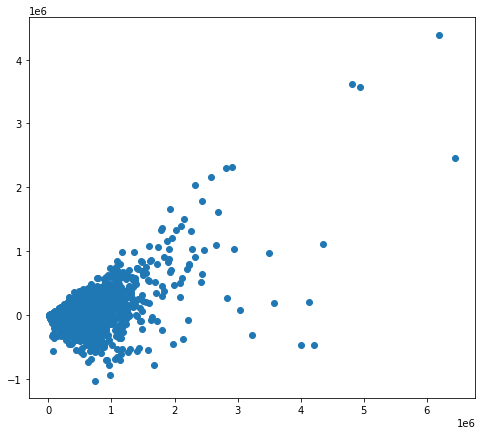

In [ ]:
plt.figure(figsize=(8, 7))
plt.scatter(y_final, model.resid);

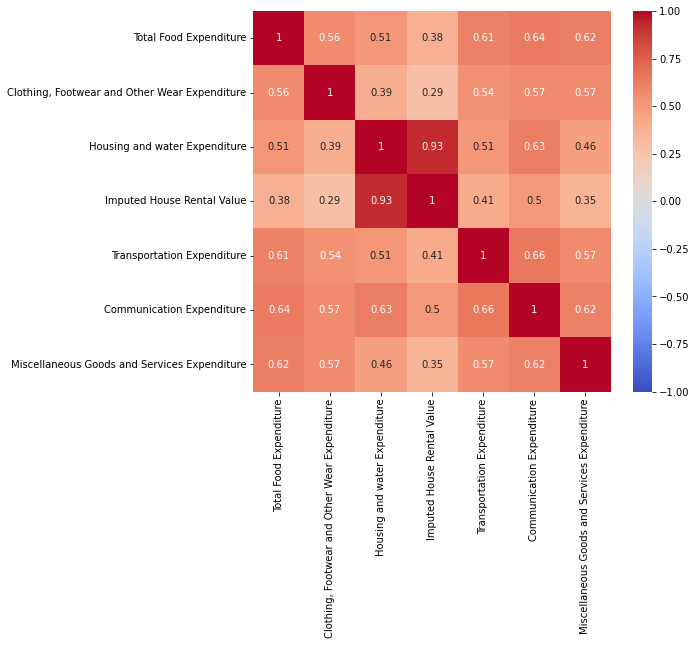

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(X_final.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

<Figure size 576x720 with 0 Axes>

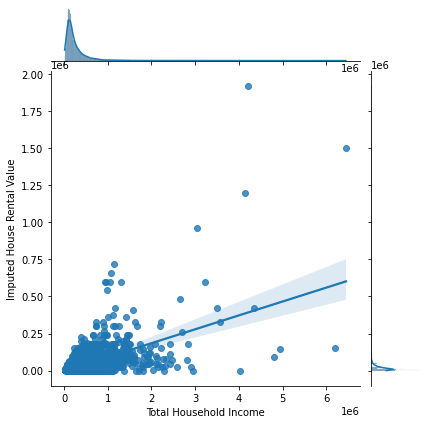

In [ ]:
plt.figure(figsize=(8, 10))
sns.jointplot(data=new_sample, x='Total Household Income', y='Imputed House Rental Value', kind='reg');

In [ ]:
r2_score(y_test, y_estimated_final)

0.7146296333507499

In [ ]:
mean_absolute_error(y_test, y_estimated_final)

60607.03087780607

In [ ]:
MSE(y_test, y_estimated_final)

18379061736.153618

In [ ]:
mean_squared_log_error(y_test, y_estimated_final)


0.0928566688900236